# FLAML을 이용한 AutoML 분석

In [1]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [8]:
data = pd.read_csv("./creaditcard_fraud_data.csv")
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

* trans_date_trans_time (object): 거래가 발생한 날짜 및 시간<br>
* cc_num (int64): 사용된 신용카드 번호를 나타내는 숫자<br>
* merchant (object): 상점명 또는 거래가 발생한 가맹점의 이름<br>
* category (object): 거래가 발생한 상품 또는 서비스의 범주<br>
* amt (float64): 해당 거래의 거래 금액<br>
* first (object): 카드 소유자의 이름<br>
* last (object): 카드 소유자의 성<br>
* gender (object): 카드 소유자의 성별<br>
* street (object): 카드 소유자의 거주지 주소의 거리<br>
* city (object): 카드 소유자의 거주지 도시<br>
* state (object): 카드 소유자의 거주지 주(State)<br>
* zip (int64): 카드 소유자의 거주지 우편번호<br>
* lat (float64): 카드 소유자의 거주지 위도(latitude)<br>
* long (float64): 카드 소유자의 거주지 경도(longitude)<br>
* city_pop (int64): 카드 소유자가 거주하는 도시의 인구 수<br>
* job (object): 카드 소유자의 직업<br>
* dob (object): 카드 소유자의 출생일(Date of Birth)<br>
* trans_num (object): 각 거래에 할당된 고유 거래 번호<br>
* unix_time (int64): 거래가 발생한 시간을 유닉스 타임스탬프 형식으로 나타낸 값<br>
* merch_lat (float64): 가맹점의 위도(latitude) 거래가 발생한 상점의 위치 정보<br>
* merch_long (float64): 가맹점의 경도(longitude)<br>
* is_fraud (int64): 거래가 사기(fraud)여부를 나타내는 열입니다. 1은 사기, 0은 정상 거래<br>

* 1. 데이터 전처리(결측값, 이상값)
* 2. EDA
* 3. Feature Engineering
* 4. Feature Selection
* 5. 데이터 분할
* 6. k-fold 교차검증, gridsearch, randomsearch, 데이터 증폭 pipeline 이용해서 모델 3가지로 비교 분석

In [9]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [10]:
pd.options.display.float_format = '{:.6f}'.format

In [11]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038393710400.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,1309115265318020352.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


In [12]:
data['name'] = data['first'] + " " + data['last']
data['name'].nunique()

989

In [13]:
data = data.drop(["name", "first", "last", "street", "city", "state", "zip", "trans_num", "unix_time"], axis=1)
data

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,46.230600,-112.113800,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770000,M,40.493100,-91.891200,519,Town planner,1966-02-13,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840000,M,29.039300,-95.440100,28739,Futures trader,1999-12-27,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880000,F,46.196600,-118.901700,3684,Musician,1981-11-29,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990000,M,44.625500,-116.449300,129,Cartographer,1965-12-15,44.470525,-117.080888,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(data, stratify=data['is_fraud'], test_size=0.4, random_state=10)

In [16]:
train['is_fraud'].value_counts()

,count
is_fraud,
0,1105645
1,5791


In [17]:
test['is_fraud'].value_counts()

,count
is_fraud,
0,737098
1,3860


In [18]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
1349054,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0
508153,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0
912706,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0
530344,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0
1126761,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365820,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0
105708,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0
602068,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0
1780135,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0


In [19]:
train['cc_num'].nunique()

999

# 카드 번호에 따른 평균 지출액, 표준편차 구하기

In [20]:
amt_by_cc_num = train.groupby('cc_num')['amt'].agg(['mean', 'std']).reset_index()

In [21]:
amt_by_cc_num

,cc_num,mean,std
0,60416207185,61.313763,161.657736
1,60422928733,65.278174,90.900398
2,60423098130,116.621949,1248.438561
3,60427851591,104.790490,119.746806
4,60487002085,70.822757,182.542688
...,...,...,...
994,4958589671582726883,68.121702,156.519908
995,4973530368125489546,69.837241,136.312982
996,4980323467523543940,71.559318,126.591056
997,4989847570577635369,93.801177,136.023783


In [22]:
train = pd.merge(train, amt_by_cc_num, how='left', on='cc_num')

In [23]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,mean,std
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,73.414795,131.574335
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,59.766495,147.773396
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,97.885517,103.125597
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,89.205841,127.017879
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,63.371306,112.601803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,59.117192,149.629935
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,54.625542,131.268419
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,62.540364,293.792067
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,55.467010,99.480757


# 이상지출 탐지하기
* 평소 사용자가 지출하던 금액보다 과도하게 높은 경우
* z스코어를 이용해 탐지
* z-score = 값 - 평균 / 표준편차

In [24]:
train['amt_z_score'] = (train['amt'] - train['mean'] ) / train['std']

In [25]:
train[['amt', 'mean', 'std', 'amt_z_score']]

,amt,mean,std,amt_z_score
0,130.680000,73.414795,131.574335,0.435231
1,54.460000,59.766495,147.773396,-0.035910
2,42.420000,97.885517,103.125597,-0.537844
3,77.050000,89.205841,127.017879,-0.095702
4,1.950000,63.371306,112.601803,-0.545474
...,...,...,...,...
1111431,11.330000,59.117192,149.629935,-0.319369
1111432,4.870000,54.625542,131.268419,-0.379037
1111433,70.320000,62.540364,293.792067,0.026480
1111434,121.300000,55.467010,99.480757,0.661766


In [26]:
amt_z_over_3 = train[train['amt_z_score'] > 3]

In [27]:
amt_z_over_3['is_fraud'].mean()

0.15655844558942206

In [28]:
train['is_fraud'].mean()

0.005210376485915518

# 이상지출 탐지하기2
* 사람별로 지출하는 카테고리가 다르기 때문에 평소 지출하는 카테고리가 아닌 경우를 필터링
* 평소 많이 지출하는 카테고리가 아닌 경우 의심

In [29]:
train[train['cc_num'] == 377895991033232]['category'].value_counts()

,count
category,
home,94
food_dining,84
grocery_pos,84
shopping_pos,84
entertainment,81
misc_pos,76
gas_transport,76
personal_care,76
kids_pets,72


In [30]:
train['category'].nunique()

14

In [31]:
train[train['cc_num'] == 4158008602445]['category'].value_counts()

,count
category,
gas_transport,63
personal_care,43
home,42
shopping_pos,42
kids_pets,41
grocery_pos,40
food_dining,36
shopping_net,34
misc_pos,27


In [32]:
amtbycategory = train.groupby(['cc_num', 'category'])['amt'].agg(['mean', 'std']).reset_index()
amtbycategory

,cc_num,category,mean,std
0,60416207185,entertainment,51.753913,82.038576
1,60416207185,food_dining,26.269865,37.007297
2,60416207185,gas_transport,60.279459,16.723792
3,60416207185,grocery_net,53.136222,19.302610
4,60416207185,grocery_pos,100.872627,20.693912
...,...,...,...,...
13056,4992346398065154184,misc_pos,62.650132,195.941653
13057,4992346398065154184,personal_care,50.903566,50.919109
13058,4992346398065154184,shopping_net,107.564161,262.102933
13059,4992346398065154184,shopping_pos,61.826306,184.695165


In [33]:
train = pd.merge(train, amtbycategory, how='left', on=['cc_num', 'category'])

In [34]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,mean_x,std_x,amt_z_score,mean_y,std_y
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,73.414795,131.574335,0.435231,77.601548,45.818777
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,59.766495,147.773396,-0.035910,47.625806,47.145251
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,97.885517,103.125597,-0.537844,49.757807,4.623726
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,89.205841,127.017879,-0.095702,60.795242,47.326641
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,63.371306,112.601803,-0.545474,95.786579,209.203479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,59.117192,149.629935,-0.319369,71.607939,91.758240
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,54.625542,131.268419,-0.379037,53.431014,304.858339
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,62.540364,293.792067,0.026480,64.247117,34.855381
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,55.467010,99.480757,0.661766,50.198143,50.149951


In [35]:
train['category_z_score'] = (train['amt'] - train['mean_y'] ) / train['std_y']
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,mean_x,std_x,amt_z_score,mean_y,std_y,category_z_score
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,73.414795,131.574335,0.435231,77.601548,45.818777,1.158443
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,59.766495,147.773396,-0.035910,47.625806,47.145251,0.144960
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,97.885517,103.125597,-0.537844,49.757807,4.623726,-1.586990
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,89.205841,127.017879,-0.095702,60.795242,47.326641,0.343459
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,63.371306,112.601803,-0.545474,95.786579,209.203479,-0.448542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,59.117192,149.629935,-0.319369,71.607939,91.758240,-0.656921
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,54.625542,131.268419,-0.379037,53.431014,304.858339,-0.159290
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,62.540364,293.792067,0.026480,64.247117,34.855381,0.174231
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,55.467010,99.480757,0.661766,50.198143,50.149951,1.417785


In [36]:
train = train.drop(['mean_x', 'std_x', 'mean_y', 'std_y'], axis=1)
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_score
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,0.435231,1.158443
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,-0.035910,0.144960
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,-0.537844,-1.586990
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,-0.095702,0.343459
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,-0.545474,-0.448542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,-0.319369,-0.656921
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,-0.379037,-0.159290
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,0.026480,0.174231
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,0.661766,1.417785


In [37]:
happen_fraud = train.groupby(['merchant', 'category'])[['is_fraud']].mean().sort_values(by='is_fraud', ascending=False).reset_index()
happen_fraud

,merchant,category,is_fraud
0,"fraud_Herman, Treutel and Dickens",misc_net,0.022433
1,fraud_Terry-Huel,shopping_net,0.021765
2,fraud_Brown PLC,misc_net,0.021442
3,fraud_Goyette Inc,shopping_net,0.021097
4,fraud_Rau and Sons,grocery_pos,0.020930
...,...,...,...
695,"fraud_Hodkiewicz, Prohaska and Paucek",travel,0.000000
696,fraud_Trantow PLC,grocery_net,0.000000
697,fraud_Reichert-Weissnat,travel,0.000000
698,fraud_Windler LLC,kids_pets,0.000000


In [38]:
happen_fraud.columns = ['merchant', 'category', 'is_fraud_rate']
happen_fraud

,merchant,category,is_fraud_rate
0,"fraud_Herman, Treutel and Dickens",misc_net,0.022433
1,fraud_Terry-Huel,shopping_net,0.021765
2,fraud_Brown PLC,misc_net,0.021442
3,fraud_Goyette Inc,shopping_net,0.021097
4,fraud_Rau and Sons,grocery_pos,0.020930
...,...,...,...
695,"fraud_Hodkiewicz, Prohaska and Paucek",travel,0.000000
696,fraud_Trantow PLC,grocery_net,0.000000
697,fraud_Reichert-Weissnat,travel,0.000000
698,fraud_Windler LLC,kids_pets,0.000000


In [39]:
train = pd.merge(train, happen_fraud, how='left', on=['merchant', 'category'] )
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_score,is_fraud_rate
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,0.435231,1.158443,0.001277
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,-0.035910,0.144960,0.001370
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,-0.537844,-1.586990,0.000000
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,-0.095702,0.343459,0.000483
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,-0.545474,-0.448542,0.017136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,-0.319369,-0.656921,0.002382
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,-0.379037,-0.159290,0.008722
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,0.026480,0.174231,0.011353
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,0.661766,1.417785,0.003351


In [40]:
train['city_pop'].nunique()

891

In [41]:
fraudbypop = train.groupby(['city_pop','is_fraud'])['is_fraud'].value_counts()
fraudbypop

city_pop  is_fraud
23        0           1743
          1              4
37        0            905
          1              2
43        0           1740
                      ... 
2383912   1              3
2504700   0           1775
          1              8
2906700   0           3512
          1             21
Name: count, Length: 1694, dtype: int64

In [42]:
fraudbypop

city_pop  is_fraud
23        0           1743
          1              4
37        0            905
          1              2
43        0           1740
                      ... 
2383912   1              3
2504700   0           1775
          1              8
2906700   0           3512
          1             21
Name: count, Length: 1694, dtype: int64

In [43]:
# 각 city_pop에서 is_fraud가 1인 비율을 계산
fraudbypop = train.groupby(['city_pop', 'is_fraud'])['is_fraud'].count().unstack()

# is_fraud가 1인 비율 계산 (사기 거래의 비율)
fraudbypop['fraud_ratio'] = fraudbypop[1] / fraudbypop.sum(axis=1)

# 결괏값 출력
print(fraudbypop[['fraud_ratio']])

is_fraud  fraud_ratio
city_pop             
23           0.002290
37           0.002205
43                NaN
46           0.002683
47           0.004494
...               ...
1577385      0.010417
1595797      0.003404
2383912      0.006579
2504700      0.004487
2906700      0.005944

[891 rows x 1 columns]


In [44]:
train.groupby('gender')['is_fraud'].value_counts()

gender  is_fraud
F       0           605978
        1             2958
M       0           499667
        1             2833
Name: count, dtype: int64

In [45]:
train['job'].value_counts()

,count
job,
Film/video editor,8439
Exhibition designer,7883
"Surveyor, land/geomatics",7461
Naval architect,7376
"Designer, ceramics/pottery",6962
...,...
Veterinary surgeon,4
"Engineer, water",4
Contracting civil engineer,4


In [46]:
train.groupby('job')['is_fraud'].value_counts()

job                              is_fraud
Academic librarian               0            896
                                 1              9
Accountant, chartered            1              6
Accountant, chartered certified  0            436
                                 1             10
                                             ... 
Web designer                     1             10
Wellsite geologist               0           2227
                                 1             19
Writer                           0            444
                                 1             10
Name: count, Length: 969, dtype: int64

In [47]:
# 각 city_pop에서 is_fraud가 1인 비율을 계산
fraudbyjob = train.groupby(['job', 'is_fraud'])['is_fraud'].count().unstack()

# is_fraud가 1인 비율 계산 (사기 거래의 비율)
fraudbyjob['fraud_ratio'] = fraudbyjob[1] / fraudbyjob.sum(axis=1)

# 결괏값 출력


In [48]:
print(fraudbyjob[['fraud_ratio']].sort_values(by='fraud_ratio', ascending=False))

is_fraud                           fraud_ratio
job                                           
Sales promotion account executive     1.000000
Dancer                                1.000000
Industrial buyer                      1.000000
Engineer, site                        1.000000
Air traffic controller                1.000000
...                                        ...
Aid worker                            0.000573
Contractor                            0.000375
Engineer, communications                   NaN
Engineer, drilling                         NaN
Stage manager                              NaN

[497 rows x 1 columns]


In [49]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

In [50]:
train['trans_date_trans_time'].dtype

dtype('<M8[ns]')

In [51]:
train['trans_date_trans_time'].apply(lambda x: x.year)

,trans_date_trans_time
0,2020
1,2019
2,2019
3,2019
4,2020
...,...
1111431,2020
1111432,2019
1111433,2019
1111434,2020


In [52]:
train['age'] = train['dob'].apply(lambda x: 2020-int(x[:4]))

In [53]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_score,is_fraud_rate,age
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,0.435231,1.158443,0.001277,56
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,-0.035910,0.144960,0.001370,30
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,-0.537844,-1.586990,0.000000,36
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,-0.095702,0.343459,0.000483,38
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,-0.545474,-0.448542,0.017136,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,-0.319369,-0.656921,0.002382,46
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,-0.379037,-0.159290,0.008722,44
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,0.026480,0.174231,0.011353,45
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,0.661766,1.417785,0.003351,35


# 위도 경도 정보로 거리 계산하기
* 카드 사용자의 주거지 위치와 카드 사용처의 거리를 계산해서 너무 멀면 사기일 가능이 높다.

In [54]:
# !pip install geopy

In [55]:
import geopy.distance

In [56]:
train['customer_coord'] = pd.Series(zip(train['lat'], train['long']))
train['merchant_coord'] = pd.Series(zip(train['merch_lat'], train['merch_long']))
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,amt_z_score,category_z_score,is_fraud_rate,age,customer_coord,merchant_coord
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",1964-11-17,41.809910,-73.494581,0,0.435231,1.158443,0.001277,56,"(41.4682, -72.5751)","(41.80991, -73.49458100000001)"
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,1990-11-23,30.858585,-102.458928,0,-0.035910,0.144960,0.001370,30,"(30.1886, -103.2214)","(30.858585, -102.458928)"
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",1984-06-04,36.405837,-84.030634,0,-0.537844,-1.586990,0.000000,36,"(37.1046, -83.5706)","(36.405837, -84.03063399999999)"
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,1982-05-28,46.111612,-121.729974,0,-0.095702,0.343459,0.000483,38,"(45.4093, -122.6847)","(46.111612, -121.729974)"
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,1966-01-04,40.945120,-82.361809,0,-0.545474,-0.448542,0.017136,54,"(41.1464, -81.5107)","(40.94512, -82.361809)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",1974-12-28,41.566847,-84.015768,0,-0.319369,-0.656921,0.002382,46,"(42.4969, -83.2911)","(41.566847, -84.01576800000001)"
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,1976-01-02,30.892429,-97.713717,0,-0.379037,-0.159290,0.008722,44,"(30.592, -97.2893)","(30.892429, -97.713717)"
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",1975-07-07,38.195483,-78.668541,0,0.026480,0.174231,0.011353,45,"(38.2586, -78.4074)","(38.195483, -78.668541)"
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,1985-03-19,38.001255,-76.190657,0,0.661766,1.417785,0.003351,35,"(38.4121, -75.2811)","(38.001255, -76.190657)"


In [57]:
train['distance'] = train.apply(lambda x: geopy.distance.distance(x['customer_coord'], x['merchant_coord']).km, axis=1)

In [58]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,amt_z_score,category_z_score,is_fraud_rate,age,customer_coord,merchant_coord,distance
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",...,41.809910,-73.494581,0,0.435231,1.158443,0.001277,56,"(41.4682, -72.5751)","(41.80991, -73.49458100000001)",85.493659
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,...,30.858585,-102.458928,0,-0.035910,0.144960,0.001370,30,"(30.1886, -103.2214)","(30.858585, -102.458928)",104.268083
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",...,36.405837,-84.030634,0,-0.537844,-1.586990,0.000000,36,"(37.1046, -83.5706)","(36.405837, -84.03063399999999)",87.752495
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,...,46.111612,-121.729974,0,-0.095702,0.343459,0.000483,38,"(45.4093, -122.6847)","(46.111612, -121.729974)",107.748245
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,...,40.945120,-82.361809,0,-0.545474,-0.448542,0.017136,54,"(41.1464, -81.5107)","(40.94512, -82.361809)",74.968301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",...,41.566847,-84.015768,0,-0.319369,-0.656921,0.002382,46,"(42.4969, -83.2911)","(41.566847, -84.01576800000001)",119.468278
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,...,30.892429,-97.713717,0,-0.379037,-0.159290,0.008722,44,"(30.592, -97.2893)","(30.892429, -97.713717)",52.546596
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",...,38.195483,-78.668541,0,0.026480,0.174231,0.011353,45,"(38.2586, -78.4074)","(38.195483, -78.668541)",23.914997
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,...,38.001255,-76.190657,0,0.661766,1.417785,0.003351,35,"(38.4121, -75.2811)","(38.001255, -76.190657)",91.792859


In [59]:
train['distance'].describe()

,distance
count,1111436.000000
mean,76.100343
std,29.105449
min,0.066731
25%,55.315355
50%,78.236746
75%,98.467537
max,150.580192


In [60]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_z_score', 'category_z_score',
       'is_fraud_rate', 'age', 'customer_coord', 'merchant_coord', 'distance'],
      dtype='object')

In [61]:
spendbydistance = train.groupby('cc_num')['distance'].agg(['mean','std']).reset_index()
spendbydistance

,cc_num,mean,std
0,60416207185,73.180967,28.818318
1,60422928733,79.264540,29.065396
2,60423098130,76.275212,28.490443
3,60427851591,75.802816,28.622771
4,60487002085,80.675308,28.294072
...,...,...,...
994,4958589671582726883,76.716519,28.539650
995,4973530368125489546,78.204656,29.360753
996,4980323467523543940,72.036121,28.899090
997,4989847570577635369,75.873938,29.833844


In [62]:
train = pd.merge(train, spendbydistance, how='left', on='cc_num')
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,is_fraud,amt_z_score,category_z_score,is_fraud_rate,age,customer_coord,merchant_coord,distance,mean,std
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",...,0,0.435231,1.158443,0.001277,56,"(41.4682, -72.5751)","(41.80991, -73.49458100000001)",85.493659,76.293476,28.561097
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,...,0,-0.035910,0.144960,0.001370,30,"(30.1886, -103.2214)","(30.858585, -102.458928)",104.268083,79.514404,29.689135
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",...,0,-0.537844,-1.586990,0.000000,36,"(37.1046, -83.5706)","(36.405837, -84.03063399999999)",87.752495,75.600684,29.329430
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,...,0,-0.095702,0.343459,0.000483,38,"(45.4093, -122.6847)","(46.111612, -121.729974)",107.748245,73.150903,28.550764
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,...,0,-0.545474,-0.448542,0.017136,54,"(41.1464, -81.5107)","(40.94512, -82.361809)",74.968301,75.369223,28.173032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",...,0,-0.319369,-0.656921,0.002382,46,"(42.4969, -83.2911)","(41.566847, -84.01576800000001)",119.468278,74.029673,28.486891
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,...,0,-0.379037,-0.159290,0.008722,44,"(30.592, -97.2893)","(30.892429, -97.713717)",52.546596,78.755464,29.749438
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",...,0,0.026480,0.174231,0.011353,45,"(38.2586, -78.4074)","(38.195483, -78.668541)",23.914997,77.346187,29.142115
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,...,0,0.661766,1.417785,0.003351,35,"(38.4121, -75.2811)","(38.001255, -76.190657)",91.792859,76.920152,28.902125


In [63]:
train['distance_z_score'] = (train['distance'] - train['mean']) / train['std']
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,amt_z_score,category_z_score,is_fraud_rate,age,customer_coord,merchant_coord,distance,mean,std,distance_z_score
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",...,0.435231,1.158443,0.001277,56,"(41.4682, -72.5751)","(41.80991, -73.49458100000001)",85.493659,76.293476,28.561097,0.322123
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,...,-0.035910,0.144960,0.001370,30,"(30.1886, -103.2214)","(30.858585, -102.458928)",104.268083,79.514404,29.689135,0.833762
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",...,-0.537844,-1.586990,0.000000,36,"(37.1046, -83.5706)","(36.405837, -84.03063399999999)",87.752495,75.600684,29.329430,0.414321
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,...,-0.095702,0.343459,0.000483,38,"(45.4093, -122.6847)","(46.111612, -121.729974)",107.748245,73.150903,28.550764,1.211783
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,...,-0.545474,-0.448542,0.017136,54,"(41.1464, -81.5107)","(40.94512, -82.361809)",74.968301,75.369223,28.173032,-0.014231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",...,-0.319369,-0.656921,0.002382,46,"(42.4969, -83.2911)","(41.566847, -84.01576800000001)",119.468278,74.029673,28.486891,1.595071
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,...,-0.379037,-0.159290,0.008722,44,"(30.592, -97.2893)","(30.892429, -97.713717)",52.546596,78.755464,29.749438,-0.880987
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",...,0.026480,0.174231,0.011353,45,"(38.2586, -78.4074)","(38.195483, -78.668541)",23.914997,77.346187,29.142115,-1.833470
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,...,0.661766,1.417785,0.003351,35,"(38.4121, -75.2811)","(38.001255, -76.190657)",91.792859,76.920152,28.902125,0.514589


In [64]:
train = train.drop(['mean', 'std'], axis=1)
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,merch_long,is_fraud,amt_z_score,category_z_score,is_fraud_rate,age,customer_coord,merchant_coord,distance,distance_z_score
0,2020-07-09 06:53:00,377895991033232,fraud_Zboncak Ltd,food_dining,130.680000,F,41.468200,-72.575100,5438,"Librarian, academic",...,-73.494581,0,0.435231,1.158443,0.001277,56,"(41.4682, -72.5751)","(41.80991, -73.49458100000001)",85.493659,0.322123
1,2019-08-08 18:20:52,38588538868506,fraud_Fritsch and Sons,health_fitness,54.460000,F,30.188600,-103.221400,498,Lexicographer,...,-102.458928,0,-0.035910,0.144960,0.001370,30,"(30.1886, -103.2214)","(30.858585, -102.458928)",104.268083,0.833762
2,2019-12-29 14:00:23,349612764943496,fraud_Windler LLC,kids_pets,42.420000,M,37.104600,-83.570600,467,"Psychologist, forensic",...,-84.030634,0,-0.537844,-1.586990,0.000000,36,"(37.1046, -83.5706)","(36.405837, -84.03063399999999)",87.752495,0.414321
3,2019-08-16 18:02:28,4874017206859125,"fraud_Prosacco, Kreiger and Kovacek",home,77.050000,F,45.409300,-122.684700,42817,Planning and development surveyor,...,-121.729974,0,-0.095702,0.343459,0.000483,38,"(45.4093, -122.6847)","(46.111612, -121.729974)",107.748245,1.211783
4,2020-04-14 00:21:46,5501083170975659,fraud_Jast Ltd,shopping_net,1.950000,M,41.146400,-81.510700,47772,Equities trader,...,-82.361809,0,-0.545474,-0.448542,0.017136,54,"(41.1464, -81.5107)","(40.94512, -82.361809)",74.968301,-0.014231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111431,2020-07-14 19:29:36,676369110710,fraud_Nienow PLC,entertainment,11.330000,M,42.496900,-83.291100,75830,"Engineer, automotive",...,-84.015768,0,-0.319369,-0.656921,0.002382,46,"(42.4969, -83.2911)","(41.566847, -84.01576800000001)",119.468278,1.595071
1111432,2019-03-02 15:25:33,30238755902988,fraud_Macejkovic-Lesch,shopping_pos,4.870000,F,30.592000,-97.289300,1766,Press sub,...,-97.713717,0,-0.379037,-0.159290,0.008722,44,"(30.592, -97.2893)","(30.892429, -97.713717)",52.546596,-0.880987
1111433,2019-09-13 03:44:55,4099707841315751,fraud_Hackett-Lueilwitz,grocery_pos,70.320000,M,38.258600,-78.407400,9815,"Designer, ceramics/pottery",...,-78.668541,0,0.026480,0.174231,0.011353,45,"(38.2586, -78.4074)","(38.195483, -78.668541)",23.914997,-1.833470
1111434,2020-12-15 16:09:57,345933964507467,"fraud_Wuckert, Wintheiser and Friesen",home,121.300000,F,38.412100,-75.281100,718,Regulatory affairs officer,...,-76.190657,0,0.661766,1.417785,0.003351,35,"(38.4121, -75.2811)","(38.001255, -76.190657)",91.792859,0.514589


In [65]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_z_score', 'category_z_score',
       'is_fraud_rate', 'age', 'customer_coord', 'merchant_coord', 'distance',
       'distance_z_score'],
      dtype='object')

In [66]:
train = train[['gender', 'age', 'amt', 'amt_z_score', 'category_z_score',
       'is_fraud_rate', 'distance_z_score', 'is_fraud']]
train

,gender,age,amt,amt_z_score,category_z_score,is_fraud_rate,distance_z_score,is_fraud
0,F,56,130.680000,0.435231,1.158443,0.001277,0.322123,0
1,F,30,54.460000,-0.035910,0.144960,0.001370,0.833762,0
2,M,36,42.420000,-0.537844,-1.586990,0.000000,0.414321,0
3,F,38,77.050000,-0.095702,0.343459,0.000483,1.211783,0
4,M,54,1.950000,-0.545474,-0.448542,0.017136,-0.014231,0
...,...,...,...,...,...,...,...,...
1111431,M,46,11.330000,-0.319369,-0.656921,0.002382,1.595071,0
1111432,F,44,4.870000,-0.379037,-0.159290,0.008722,-0.880987,0
1111433,M,45,70.320000,0.026480,0.174231,0.011353,-1.833470,0
1111434,F,35,121.300000,0.661766,1.417785,0.003351,0.514589,0


In [67]:
train = train.dropna()

In [68]:
X = train.drop('is_fraud', axis=1)
y = train['is_fraud']

In [69]:
X = pd.get_dummies(X, drop_first=True)
X

,age,amt,amt_z_score,category_z_score,is_fraud_rate,distance_z_score,gender_M
0,56,130.680000,0.435231,1.158443,0.001277,0.322123,False
1,30,54.460000,-0.035910,0.144960,0.001370,0.833762,False
2,36,42.420000,-0.537844,-1.586990,0.000000,0.414321,True
3,38,77.050000,-0.095702,0.343459,0.000483,1.211783,False
4,54,1.950000,-0.545474,-0.448542,0.017136,-0.014231,True
...,...,...,...,...,...,...,...
1111431,46,11.330000,-0.319369,-0.656921,0.002382,1.595071,True
1111432,44,4.870000,-0.379037,-0.159290,0.008722,-0.880987,False
1111433,45,70.320000,0.026480,0.174231,0.011353,-1.833470,True
1111434,35,121.300000,0.661766,1.417785,0.003351,0.514589,False


In [70]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1111431,0
1111432,0
1111433,0
1111434,0


In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=10)

<Axes: >

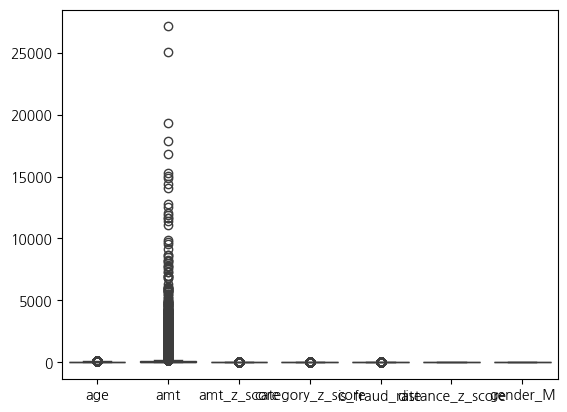

In [72]:
sns.boxplot(X_train)

In [73]:
from sklearn.preprocessing import RobustScaler

In [74]:
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,age,amt,amt_z_score,category_z_score,is_fraud_rate,distance_z_score,gender_M
0,-0.120000,-0.438248,-0.245238,-0.462301,-0.429984,-0.464426,0.000000
1,-0.520000,-0.586235,-0.173704,-0.224935,3.295769,0.167659,1.000000
2,0.040000,0.126088,0.377754,0.057108,0.381709,0.701489,0.000000
3,-0.920000,-0.599157,-0.226930,-0.396204,-0.521562,-0.937987,0.000000
4,0.120000,-0.044206,0.161592,-0.313074,2.035815,-0.114623,1.000000
...,...,...,...,...,...,...,...
666718,0.320000,-0.563520,0.075738,-0.701330,-0.348972,0.151480,1.000000
666719,-0.160000,0.573041,0.254706,-1.003738,1.496688,0.612879,1.000000
666720,-0.560000,0.360582,-0.090605,-0.591563,0.079589,-0.315241,1.000000
666721,-0.040000,-0.335691,-0.192562,-1.341387,-0.040409,0.400876,0.000000


In [75]:
X_valid = rs.transform(X_valid)
X_valid

array([[-0.64      , -0.59548422, -0.48221882, ...,  2.19722882,
        -0.44048817,  0.        ],
       [-0.56      , -0.41811752, -0.21385502, ..., -0.08226154,
        -0.79231353,  0.        ],
       [-0.36      , -0.19804135,  0.09767499, ...,  0.07270857,
         0.37729778,  1.        ],
       ...,
       [ 0.64      ,  0.19056039,  0.22230541, ..., -0.39583687,
        -0.22721376,  0.        ],
       [ 1.4       , -0.44749728, -0.65270298, ..., -0.35883193,
         0.36159699,  0.        ],
       [ 0.16      , -0.11289445, -0.43279266, ..., -0.2683236 ,
        -0.24926838,  0.        ]])

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [77]:
xgb = XGBClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=10)
xgb.fit(X_train_scaled, y_train)
valid_pred = xgb.predict(X_valid)
print(classification_report(y_valid, valid_pred))
print("roc_auc_score: ", roc_auc_score(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442258
           1       0.74      0.55      0.63      2225

    accuracy                           1.00    444483
   macro avg       0.87      0.78      0.82    444483
weighted avg       1.00      1.00      1.00    444483

roc_auc_score:  0.7761487247186692


In [78]:
y.value_counts()

,count
is_fraud,
0,1105643
1,5563


In [79]:
from imblearn.over_sampling import SMOTE

- SMOTE(Synthetic Minority Over-sampling Technique)는 불균형한 데이터셋에서 소수 클래스의 데이터를 생성하여 균형을 맞추기 위한 방법
- 증폭

In [80]:
sm = SMOTE(random_state=10)
X_smt, y_smt = sm.fit_resample(X_train_scaled, y_train)

In [81]:
y_smt.value_counts()

,count
is_fraud,
0,663385
1,663385


In [82]:
len(X_valid)

444483

In [83]:
y_valid.value_counts()

,count
is_fraud,
0,442258
1,2225


In [84]:
xgb = XGBClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=10)
xgb.fit(X_smt, y_smt)
valid_pred = xgb.predict(X_valid)
print(classification_report(y_valid, valid_pred))
print("roc_auc_score: ", roc_auc_score(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    442258
           1       0.34      0.83      0.48      2225

    accuracy                           0.99    444483
   macro avg       0.67      0.91      0.74    444483
weighted avg       1.00      0.99      0.99    444483

roc_auc_score:  0.9098388199963201


In [85]:
!pip install "flaml[catboost]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 9.9 MB/s eta 0:00:00


In [87]:
from flaml import AutoML
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


* AutoML을 사용하여 자동으로 모델을 학습하고, 검증 데이터에 대해 예측을 수행하는 코드
* 시간 제한과 성능 지표를 설정하여 자동으로 가장 적합한 모델을 찾아줍니다.

In [88]:
automl = AutoML(time_budget=600, Metric='roc_auc',
                task='classification',
                log_file_name = "fraud_detection.log")
automl.fit(X_smt, y_smt)
pred = automl.predict(X_valid)
print(classification_report(y_valid, pred))

[flaml.automl.logger: 10-16 03:15:59] {1728} INFO - task = classification
[flaml.automl.logger: 10-16 03:15:59] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-16 03:16:02] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-16 03:16:02] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 10-16 03:16:02] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-16 03:16:02] {2393} INFO - Estimated sufficient time budget=299550s. Estimated necessary time budget=7384s.
[flaml.automl.logger: 10-16 03:16:02] {2442} INFO -  at 11.2s,	estimator lgbm's best error=0.0516,	best estimator lgbm's best error=0.0516
[flaml.automl.logger: 10-16 03:16:02] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-16 03:16:02] {2442} INFO -  at 11.5s,	estimator lgbm's best error=0.0516,	best estimator lgbm's best error=0.0516
[flam

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 10-16 03:16:03] {2442} INFO -  at 11.8s,	estimator sgd's best error=0.1618,	best estimator lgbm's best error=0.0516
[flaml.automl.logger: 10-16 03:16:03] {2258} INFO - iteration 3, current learner sgd
[flaml.automl.logger: 10-16 03:16:03] {2442} INFO -  at 12.1s,	estimator sgd's best error=0.1597,	best estimator lgbm's best error=0.0516
[flaml.automl.logger: 10-16 03:16:03] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 10-16 03:16:03] {2442} INFO -  at 12.2s,	estimator lgbm's best error=0.0491,	best estimator lgbm's best error=0.0491
[flaml.automl.logger: 10-16 03:16:03] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 10-16 03:16:03] {2442} INFO -  at 12.3s,	estimator lgbm's best error=0.0172,	best estimator lgbm's best error=0.0172
[flaml.automl.logger: 10-16 03:16:03] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 10-16 03:16:03] {2442} INFO -  at 12.5s,	estimator lgbm's best error=0.0172,	best

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 10-16 03:22:22] {2442} INFO -  at 390.7s,	estimator lrl1's best error=0.1725,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 10-16 03:22:22] {2258} INFO - iteration 156, current learner lrl1
[flaml.automl.logger: 10-16 03:22:22] {2442} INFO -  at 390.9s,	estimator lrl1's best error=0.1725,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 10-16 03:22:22] {2258} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 10-16 03:23:00] {2442} INFO -  at 428.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 10-16 03:23:00] {2258} INFO - iteration 158, current learner lrl1
[flaml.automl.logger: 10-16 03:23:00] {2442} INFO -  at 428.8s,	estimator lrl1's best error=0.1725,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 10-16 03:23:00] {2258} INFO - iteration 159, current learner catboost
[flaml.automl.logger: 10-16 03:23:11] {2442} INFO -  at 440.2s,	estimator catboost's

In [89]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(colsample_bytree=0.5812202096182376,
               learning_rate=0.34871117712082145, max_bin=511,
               min_child_samples=3, n_estimators=1, n_jobs=-1, num_leaves=178,
               reg_alpha=0.004285003114254014, reg_lambda=0.3162944472570893,
               verbose=-1)